# ACALib User Programmatic Interface (UPI) Tutorial

## Introduction

One of the main objectives of ACALib is to provide a specialized interface for astronomers, using their semantics and the needed abstractions to focus on science rather than in technical details. This is what we call the *User Programmatic Interface*, similar to an Application Program Interface (API), but focused on the user (astronomer) needs. This obviously comes with a cost: the UPI only provides the standard, fast or simple way of doing things. We argue that this is not a problem because all the packages, code and tweaks used by the UPI are available, so one could replicate the same behaviour in a few lines of python code in order to modify it. Also, this is only am interface to simplify some comon operations, so it use is not mandatory for the rest of the ACALib package.

## Object-oriented vs Procedural Programming

We decided to replicate the same functionality in both object-oriented and procedural programming paradigms. In a nutshell, the first one packs all what you can do with certain data in the same object (data + methods). In the procedural view, data are just input parameters of functions. Some astronomers are more used to one or another, so replicating successful python packages, we provide both of them. We will come back to this in the [Data Object](#Data) section

## Importing the UPI
The UPI is one of the subpackages that are automatically imported into the general acalib namespace. However, you can list the submodules of the UPI with the command ``help()``.

In [1]:
import acalib

In [2]:
help(acalib.upi)

Help on package acalib.upi in acalib:

NAME
    acalib.upi

PACKAGE CONTENTS
    axes
    data
    flux
    formatting
    reduction

DATA
    interact = <ipywidgets.widgets.interaction._InteractFactory object>
    log = <astropy.logger.AstropyLogger object>

FILE
    /home/mauricio/scm/acalib-maray/acalib/upi/__init__.py




Here we can see that the UPI is composed by:
* ``axes``: Axis manipulation functions
* ``data``: Data object-oriented interface
* ``flux``: Flux manipulation functions
* ``formatting``:  Helper functions for formatting results in the astronomical context
* ``reduction``: Common or simple data reduction operations

We will describe all of these modules besides ``formatting`` (which is not meant to be used by the users) in the following sections. However, we need first to download and load some data to work with.

## Simple Input/Output with ACAlib
Before explaining the UPI modules, we will use the common ACALib's I/O (Input/Output) interface, which follows a similar philosophy than the UPI.

### Loading Data

In [3]:
surveys = acalib.survey_table()
surveys.show_in_notebook()

idx,survey,type
0,None Fermi 5Fermi 4Fermi 3Fermi 2Fermi 1EGRET (3D)EGRET <100 MeVEGRET >100 MeVCOMPTELINT GAL 17-35 FluxINT GAL 17-60 FluxINT GAL 35-80 FluxINTEGRAL/SPI GCGRANAT/SIGMARXTE Allsky 3-8keV FluxRXTE Allsky 3-20keV FluxRXTE Allsky 8-20keV FluxBAT SNR 14-195BAT SNR 14-20BAT SNR 20-24BAT SNR 24-35BAT SNR 35-50BAT SNR 50-75BAT SNR 75-100BAT SNR 100-150BAT SNR 150-195RASS-Cnt SoftRASS-Cnt HardRASS-Cnt BroadPSPC 2.0 Deg-IntPSPC 1.0 Deg-IntPSPC 0.6 Deg-IntHRIHEAO 1 A-2RASS Background 1RASS Background 2RASS Background 3RASS Background 4RASS Background 5RASS Background 6RASS Background 7GALEX Near UVGALEX Far UVROSAT WFC F1ROSAT WFC F2EUVE 83 AEUVE 171 AEUVE 405 AEUVE 555 ADSSDSS1 BlueDSS1 RedDSS2 RedDSS2 BlueDSS2 IRSDSSgSDSSiSDSSrSDSSuSDSSzSDSSdr7gSDSSdr7iSDSSdr7rSDSSdr7uSDSSdr7zMellinger RedMellinger GreenMellinger BlueNEATH-Alpha CompSHASSA HSHASSA CCSHASSA CSHASSA SmIRIS 12IRIS 25IRIS 60IRIS 100SFD100mSFD Dust MapIRAS 12 micronIRAS 25 micronIRAS 60 micronIRAS 100 micron2MASS-J2MASS-H2MASS-KUKIDSS-YUKIDSS-JUKIDSS-HUKIDSS-KWISE 3.4WISE 4.6WISE 12WISE 22AKARI N60AKARI WIDE-SAKARI WIDE-LAKARI N160Planck 857Planck 545Planck 353Planck 217Planck 143Planck 100Planck 070Planck 044Planck 030WMAP ILCWMAP KaWMAP KWMAP QWMAP VWMAP WCOBE DIRBE/AAMCOBE DIRBE/ZSMACOGB6 (4850MHz)VLA FIRST (1.4 GHz)NVSSStripe82VLA1420MHz (Bonn)EBHISnHSUMSS 843 MHz0408MHzWENSSTGSS ADR1VLSSr0035MHzGOODS: Chandra ACIS HBGOODS: Chandra ACIS FBGOODS: Chandra ACIS SBGOODS: VLT VIMOS UGOODS: VLT VIMOS RGOODS: HST ACS BGOODS: HST ACS VGOODS: HST ACS IGOODS: HST ACS ZHawaii HDF UHawaii HDF BHawaii HDF V0201Hawaii HDF V0401Hawaii HDF RHawaii HDF IHawaii HDF zHawaii HDF HKGOODS: HST NICMOSGOODS: VLT ISAAC JGOODS: VLT ISAAC HGOODS: VLT ISAAC KsHUDF: VLT ISAAC KsGOODS: Spitzer IRAC 3.6GOODS: Spitzer IRAC 4.5GOODS: Spitzer IRAC 5.8GOODS: Spitzer IRAC 8.0GOODS: Spitzer MIPS 24GOODS: Herschel 100GOODS: Herschel 160GOODS: Herschel 250GOODS: Herschel 350GOODS: Herschel 500CDFS: LESSGOODS: VLA North,overlay_red
1,Fermi 5,overlay_red
2,Fermi 4,overlay_red
3,Fermi 3,overlay_red
4,Fermi 2,overlay_red
5,Fermi 1,overlay_red
6,EGRET (3D),overlay_red
7,EGRET <100 MeV,overlay_red
8,EGRET >100 MeV,overlay_red
9,COMPTEL,overlay_red


In [37]:
lst=acalib.query_surveys('M42',['SDSSg','SDSSi','SDSSr','SDSSu','SDSSz'])
lst

['https://skyview.gsfc.nasa.gov/tempspace/fits/skv10266364472331_1.fits',
 'https://skyview.gsfc.nasa.gov/tempspace/fits/skv10266364472331_2.fits',
 'https://skyview.gsfc.nasa.gov/tempspace/fits/skv10266364472331_3.fits',
 'https://skyview.gsfc.nasa.gov/tempspace/fits/skv10266364472331_4.fits',
 'https://skyview.gsfc.nasa.gov/tempspace/fits/skv10266364472331_5.fits']

In [38]:
filenames = []
for img in lst:
     filenames.append(acalib.download(img))

INFO: File skv10266364472331_1.fits is already downloaded, skipping... [acalib.io.readwrite]
INFO: File skv10266364472331_2.fits is already downloaded, skipping... [acalib.io.readwrite]
INFO: File skv10266364472331_3.fits is already downloaded, skipping... [acalib.io.readwrite]
INFO: File skv10266364472331_4.fits is already downloaded, skipping... [acalib.io.readwrite]
INFO: File skv10266364472331_5.fits is already downloaded, skipping... [acalib.io.readwrite]


INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]


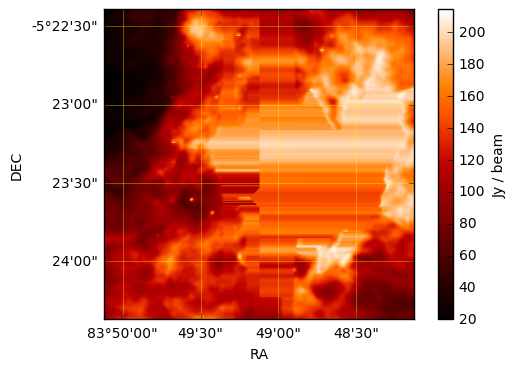

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]


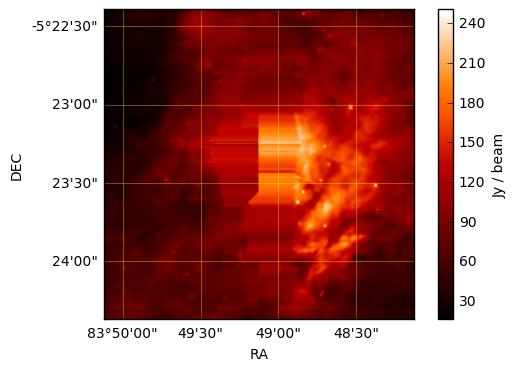

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]


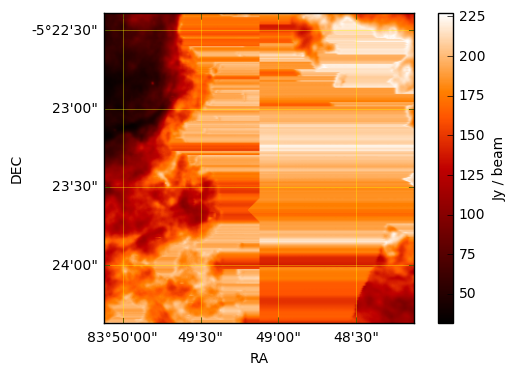

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]


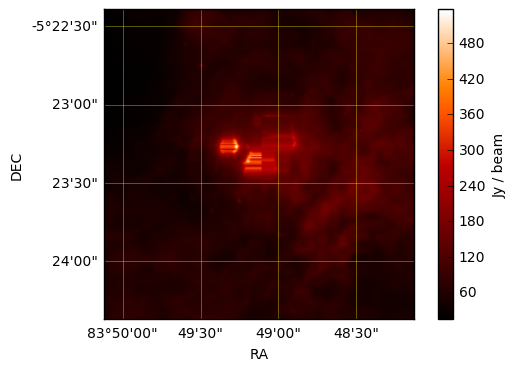

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]


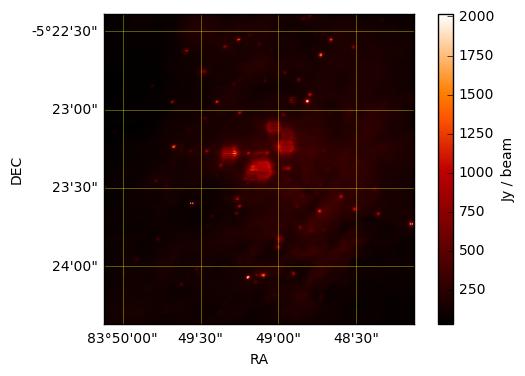

In [39]:
data_lst = []
for file in filenames:
    dat = acalib.load(file)
    data_lst.append(dat)
    dat.visualize()

INFO: overwriting Masked Objects's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Objects's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Objects's current mask with specified mask. [astropy.nddata.nddata]


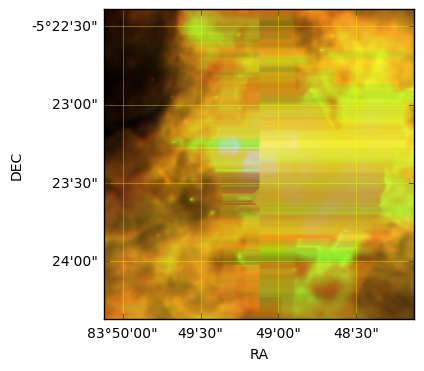

In [40]:
%matplotlib inline
acalib.visualize_rgb(data_lst[2],data_lst[0],data_lst[3])

<a id='Data'></a>
## The Data Object

In [8]:
%rm copy.fits
cont  = load_fits(orion_path)
orion = cont.primary
save_fits(cont,"copy.fits")
orion.meta

rm: cannot remove 'copy.fits': No such file or directory


NameError: name 'load_fits' is not defined

In [ ]:
%ls

### Axes Information
Check information about the axes.

In [ ]:
axnames = axes_names(orion)
print(axnames)

In [ ]:
orion_extent = extent(orion)
orion_extent

In [ ]:
orion_center = center(orion)
orion_center

In [ ]:
orion_resolution = resolution(orion)
orion_resolution

### Spectral Velocities Computations

In [ ]:
init = orion_center[0] - 10*u.MHz
end  = orion_center[0]
flis = np.linspace(init.value,end.value,num=100)*u.Hz
vels = spectral_velocities(orion,fqs=flis)
vels

In [ ]:
plt.plot(flis,vels*vels)
plt.figure()
plt.plot(flis,np.sqrt(vels*vels))

## Opening and feature test

In [ ]:
point=orion_center.copy()
point[0]=orion.wcs.wcs.restfrq*u.Hz
delta=5*orion_resolution
box=opening(orion,point,delta)
box

## Cut the cube for that opening

In [ ]:
orion_cut = cut(orion,lower=box[0],upper=box[1])
extent(orion_cut)

In [ ]:
feat=features(orion,lower=box[0],upper=box[1])
feat
#np.array([x.data for x in feat.columns])

## Plot it in 3D

In [ ]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
rav=orion_cut.data.ravel()
pm=rav>2.0
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat['FREQ'].data[pm],feat['DEC'].data[pm],feat['RA'].data[pm],c=rav[pm])
col=feat.columns[0]

In [ ]:
P=2000000.0*np.array([[0.000000000000000001,0.,0.],[0.,1.,0.],[0.,0.,1.]])
(G,lg,ug)=world_gaussian(orion,point,P,1.0,0.1)
visualize(G.sum(axis=0),wcs=moment0(orion).wcs)

## Flux related quanties

In [ ]:
noise_level(orion)

In [ ]:
(std_orion,a,b)=standarize(orion)
noise=noise_level(std_orion)
noise

In [ ]:
new_orion=unstandarize(std_orion,a,b)
noise_level(new_orion)

In [ ]:
#should be automatic!
den_orion=denoise(std_orion,threshold=noise)
noise_level(den_orion)

In [ ]:
visualize(moment0(orion))
visualize(moment0(den_orion))

In [ ]:
new_orion=add(orion,G*100.,lg,ug)
visualize(moment0(new_orion))

In [ ]:
## WTF and Denoise!
visualize(moment1(orion))

In [ ]:
visualize(moment1(den_orion))

In [ ]:
visualize(moment2(den_orion))

In [ ]:
#TODO: Spectra
dd=orion.data.shape[1]
visualize(spectra(std_orion))
visualize(spectra(den_orion))